# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.metrics import classification_report,confusion_matrix

# DATA COLLECTION

In [3]:
train = pd.read_csv('./Data/Train_data.csv')

In [4]:
test = pd.read_csv('./Data/Test.data.csv')

In [5]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.shape

(25192, 42)

In [8]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: xlabel='class', ylabel='count'>

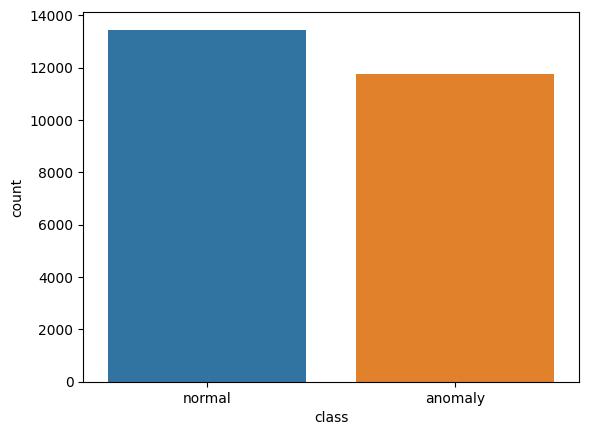

In [9]:
sns.countplot(x=train['class'])

In [10]:
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [11]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [12]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [13]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [14]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [15]:
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [16]:
X_train = X_train[selected_features]

In [17]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [19]:
x_train.shape

(17634, 10)

In [20]:
x_test.shape

(7558, 10)

# K-Nearest Neighbor 

In [21]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [22]:
knn_y_pred = knn.predict(x_test)

In [23]:
knn_y_pred_prob=knn.predict_proba(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.9744641439534268

In [25]:
error_rate = 1.0 - metrics.accuracy_score(y_test,knn_y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.025535856046573158


In [26]:
sensitivity = metrics.recall_score(y_test,knn_y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9744641439534268


In [27]:
def calculate_specificity(y_true, knn_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (knn_y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (knn_y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0  
specificity = calculate_specificity(y_test, knn_y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9802955665024631


In [28]:
f1_score = metrics.f1_score(y_test,knn_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9744553117820065


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [30]:
Lr = LogisticRegression()

In [31]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = Lr.predict(x_test)

In [33]:
y_pred_prob = Lr.predict_proba(x_test)

In [34]:
print('Accuracy of Logistic Regression is: ', Lr.score(x_test,y_test) * 100,'%')

Accuracy of Logistic Regression is:  93.8872717650172 %


In [35]:
error_rate = 1.0 - metrics.accuracy_score(y_test,y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.061127282349828005


In [36]:
sensitivity = metrics.recall_score(y_test,y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.938872717650172


In [37]:
def calculate_specificity(y_true, y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0  
specificity = calculate_specificity(y_test, y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9536945812807882


In [38]:
f1_score = metrics.f1_score(y_test,y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9388126419300873


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
clf_y_pred = rf.predict(x_test)

In [41]:
clf_y_pred_prob = rf.predict_proba(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,clf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9952368351415718


In [43]:
error_rate = 1.0 - metrics.accuracy_score(y_test,clf_y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.004763164858428204


In [44]:
sensitivity = metrics.recall_score(y_test,clf_y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9952368351415718


In [45]:
def calculate_specificity(y_true, clf_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (clf_y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (clf_y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0  
specificity = calculate_specificity(y_test, clf_y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9958128078817734


In [46]:
f1_score = metrics.f1_score(y_test,clf_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9952367405579152


## Save Models

In [ ]:
import pickle
pickle.dump(knn, open('knn_model.sav', 'wb'))
pickle.dump(rf, open('random_forest_model.sav', 'wb'))
pickle.dump(Lr, open('logistice_regression_model.sav', 'wb'))

# Results
### Confusion Matrix
### Classification Report

In [ ]:
#KNN Model

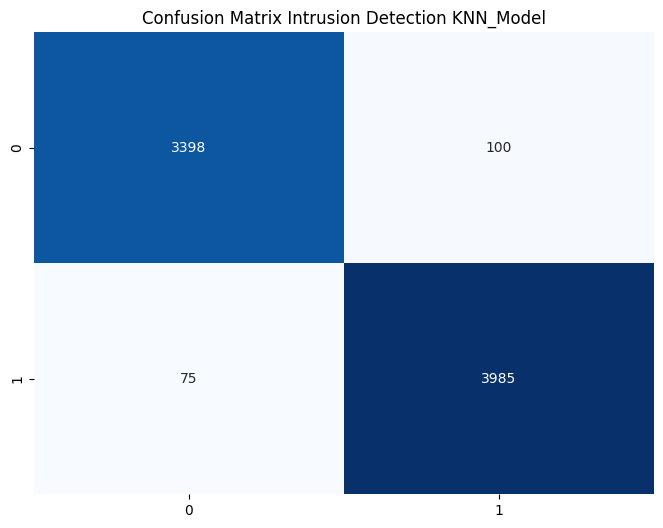

In [54]:
#Confusion Matrics
#Confusion Matrics
cm=confusion_matrix(y_test,knn_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('Confusion Matrix Intrusion Detection KNN_Model')
plt.show()

In [47]:
#Classification Report
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3498
           1       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



In [ ]:
#Random Forest Model

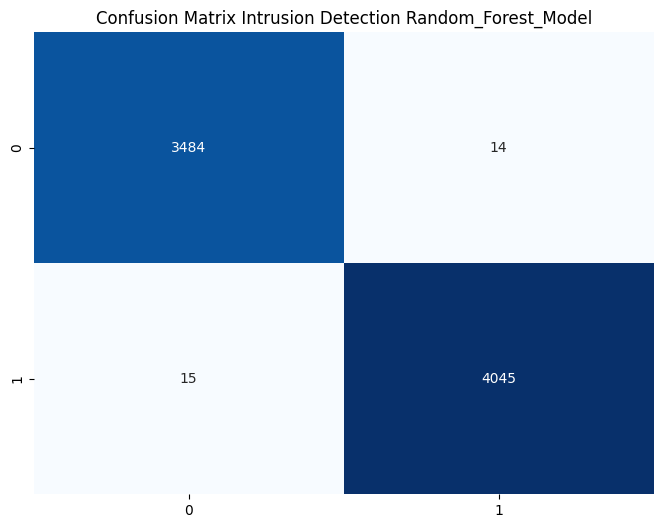

In [55]:
#Confusion Matrics
cm=confusion_matrix(y_test,clf_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('Confusion Matrix Intrusion Detection Random_Forest_Model')
plt.show()

In [49]:
#Classification Report
print(classification_report(y_test,clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3498
           1       1.00      1.00      1.00      4060

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [ ]:
#Logistic Regression Model

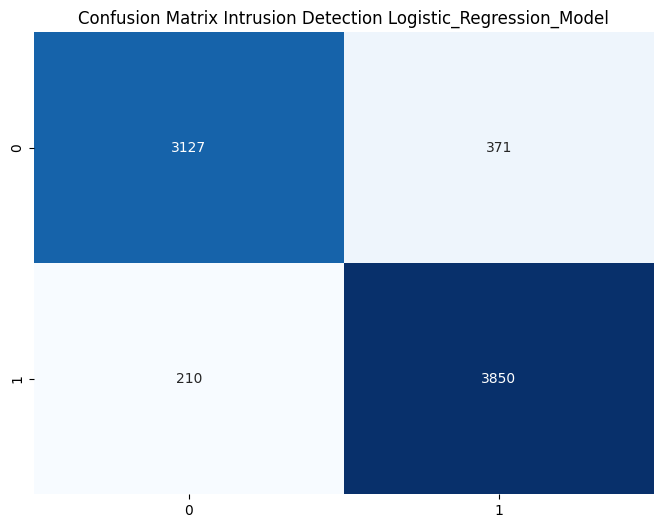

In [56]:
#Confusion Matrics
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('Confusion Matrix Intrusion Detection Logistic_Regression_Model')
plt.show()

In [48]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3498
           1       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

